In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from torch.utils.data import TensorDataset, DataLoader
from datasets import load_dataset
import matplotlib.pyplot as plt
from copy import deepcopy
import torch.nn as nn
import pandas as pd
import numpy as np
import shutil
import torch
import joblib
import json
import os

# Set default device based on whether CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dataset = load_dataset("msaad02/categorized-data", split="train")
category_df = dataset.to_pandas()

qa_df = pd.concat([
    load_dataset("msaad02/brockport-gpt-4-qa", split="train").to_pandas(),
    load_dataset("msaad02/brockport-gpt-3.5-qa", split="train").to_pandas()
])

df = pd.merge(qa_df, category_df[["url", "category", "subcategory"]], on="url", how="left")
df.dropna(inplace=True)

In [2]:
# Finding the categories with more than 4 subcategories
# These are the categories we will train on, the rest won't benefit from this
categories_to_model = df['category'].unique()[df.groupby(["category"])['subcategory'].nunique() > 4]

Starting training for category: about
Epoch: 1 	Training Loss: 1.766136 	Validation Loss: 1.743848
Epoch: 2 	Training Loss: 1.702030 	Validation Loss: 1.684175
Epoch: 3 	Training Loss: 1.614415 	Validation Loss: 1.602430
Epoch: 4 	Training Loss: 1.495478 	Validation Loss: 1.493182
Epoch: 5 	Training Loss: 1.347291 	Validation Loss: 1.364994
Epoch: 6 	Training Loss: 1.177302 	Validation Loss: 1.228743
Epoch: 7 	Training Loss: 1.015687 	Validation Loss: 1.104539
Epoch: 8 	Training Loss: 0.881061 	Validation Loss: 0.993334
Epoch: 9 	Training Loss: 0.771286 	Validation Loss: 0.904507
Epoch: 10 	Training Loss: 0.674637 	Validation Loss: 0.833931
Epoch: 11 	Training Loss: 0.603678 	Validation Loss: 0.775551
Epoch: 12 	Training Loss: 0.544334 	Validation Loss: 0.729936
Epoch: 13 	Training Loss: 0.489033 	Validation Loss: 0.693547
Epoch: 14 	Training Loss: 0.452373 	Validation Loss: 0.661593
Epoch: 15 	Training Loss: 0.415066 	Validation Loss: 0.637446
Epoch: 16 	Training Loss: 0.380065 	Valid

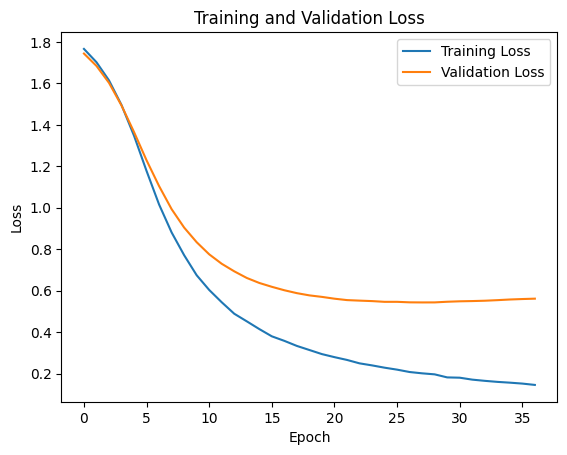

Model saved to subcat_models/about/ directory
Starting training for category: academics
Epoch: 1 	Training Loss: 3.907428 	Validation Loss: 3.729125
Epoch: 2 	Training Loss: 3.168358 	Validation Loss: 3.028354
Epoch: 3 	Training Loss: 2.316368 	Validation Loss: 2.381360
Epoch: 4 	Training Loss: 1.744837 	Validation Loss: 1.968257
Epoch: 5 	Training Loss: 1.394057 	Validation Loss: 1.717712
Epoch: 6 	Training Loss: 1.173843 	Validation Loss: 1.557003
Epoch: 7 	Training Loss: 1.021298 	Validation Loss: 1.447218
Epoch: 8 	Training Loss: 0.902292 	Validation Loss: 1.366933
Epoch: 9 	Training Loss: 0.809709 	Validation Loss: 1.310620
Epoch: 10 	Training Loss: 0.733627 	Validation Loss: 1.266884
Epoch: 11 	Training Loss: 0.673751 	Validation Loss: 1.234873
Epoch: 12 	Training Loss: 0.620159 	Validation Loss: 1.213417
Epoch: 13 	Training Loss: 0.574189 	Validation Loss: 1.197006
Epoch: 14 	Training Loss: 0.534675 	Validation Loss: 1.181865
Epoch: 15 	Training Loss: 0.498889 	Validation Loss: 

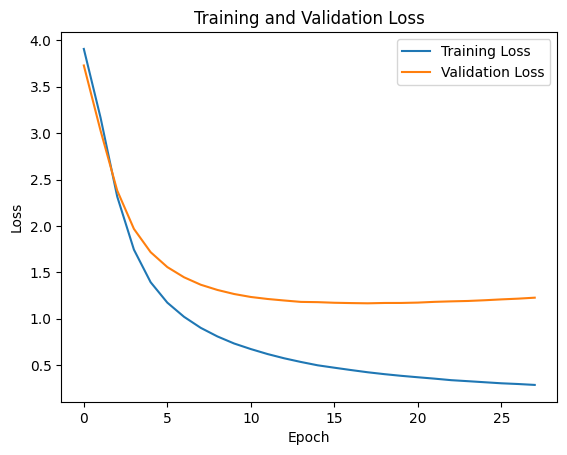

Model saved to subcat_models/academics/ directory
Starting training for category: life
Epoch: 1 	Training Loss: 2.436450 	Validation Loss: 2.401843
Epoch: 2 	Training Loss: 2.269381 	Validation Loss: 2.229592
Epoch: 3 	Training Loss: 1.974262 	Validation Loss: 1.954315
Epoch: 4 	Training Loss: 1.623018 	Validation Loss: 1.637049
Epoch: 5 	Training Loss: 1.306197 	Validation Loss: 1.362734
Epoch: 6 	Training Loss: 1.052277 	Validation Loss: 1.132224
Epoch: 7 	Training Loss: 0.863394 	Validation Loss: 0.959506
Epoch: 8 	Training Loss: 0.719168 	Validation Loss: 0.828477
Epoch: 9 	Training Loss: 0.616292 	Validation Loss: 0.731354
Epoch: 10 	Training Loss: 0.537241 	Validation Loss: 0.659125
Epoch: 11 	Training Loss: 0.476169 	Validation Loss: 0.603744
Epoch: 12 	Training Loss: 0.424198 	Validation Loss: 0.556617
Epoch: 13 	Training Loss: 0.382025 	Validation Loss: 0.521858
Epoch: 14 	Training Loss: 0.347135 	Validation Loss: 0.492681
Epoch: 15 	Training Loss: 0.320941 	Validation Loss: 0

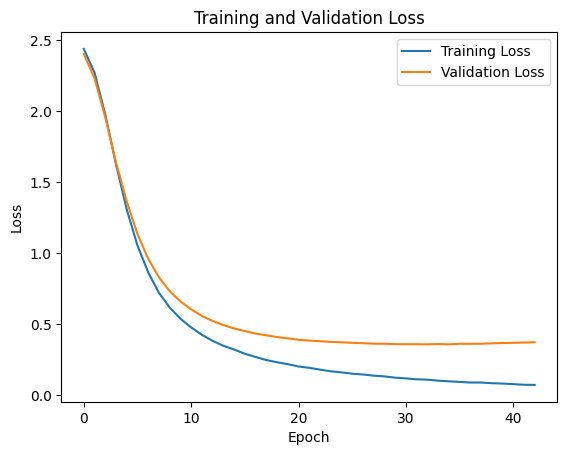

Model saved to subcat_models/life/ directory
Starting training for category: support
Epoch: 1 	Training Loss: 3.220859 	Validation Loss: 3.202283
Epoch: 2 	Training Loss: 3.084804 	Validation Loss: 3.076016
Epoch: 3 	Training Loss: 2.837476 	Validation Loss: 2.880188
Epoch: 4 	Training Loss: 2.511509 	Validation Loss: 2.642464
Epoch: 5 	Training Loss: 2.157802 	Validation Loss: 2.403550
Epoch: 6 	Training Loss: 1.843064 	Validation Loss: 2.185734
Epoch: 7 	Training Loss: 1.579195 	Validation Loss: 1.985870
Epoch: 8 	Training Loss: 1.362487 	Validation Loss: 1.822910
Epoch: 9 	Training Loss: 1.195684 	Validation Loss: 1.689499
Epoch: 10 	Training Loss: 1.058412 	Validation Loss: 1.578043
Epoch: 11 	Training Loss: 0.945702 	Validation Loss: 1.485488
Epoch: 12 	Training Loss: 0.852883 	Validation Loss: 1.412944
Epoch: 13 	Training Loss: 0.776399 	Validation Loss: 1.355265
Epoch: 14 	Training Loss: 0.709429 	Validation Loss: 1.310202
Epoch: 15 	Training Loss: 0.650328 	Validation Loss: 1.2

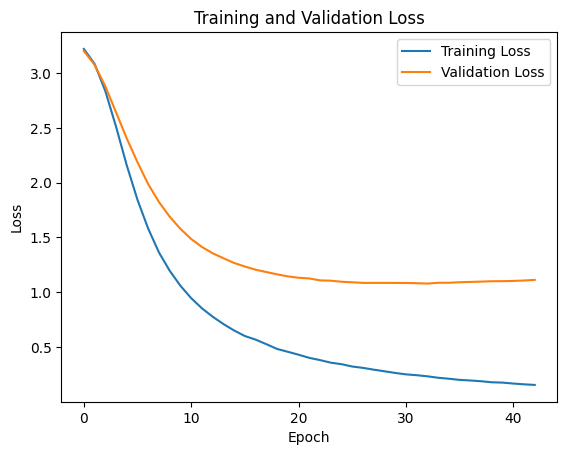

Model saved to subcat_models/support/ directory


In [3]:
# Working on training
BATCH_SIZE = 32
MAX_EPOCHS = 200 # This uses early stopping, so the model may not train for this many epochs
LEARNING_RATE = 0.0001
HIDDEN_DIM = 256
DROPOUT = 0.5
BASE_SAVE_DIR = "subcat_models/"

# check SAVE_DIR exists
if not os.path.exists(BASE_SAVE_DIR):
    os.makedirs(BASE_SAVE_DIR)

for category in categories_to_model:
    print("Starting training for category:", category)

     # Define the directory path for the category
    category_dir = os.path.join(BASE_SAVE_DIR, category)
    old_dir = os.path.join(category_dir, "old")

    # If the directory already exists and it has files in it, handle the old directory
    if os.path.exists(category_dir) and os.listdir(category_dir):  # Check if the directory exists and is not empty
        
        # Remove the old directory if it exists
        if os.path.exists(old_dir):
            shutil.rmtree(old_dir)
        
        # Create a new "old" directory
        os.makedirs(old_dir)
        
        # Move each file in the current category directory to the "old" directory
        for filename in os.listdir(category_dir):
            file_path = os.path.join(category_dir, filename)
            if os.path.isfile(file_path):  # Make sure it's a file, not a directory
                shutil.move(file_path, old_dir)
    
    # If the category directory doesn't exist, create it
    elif not os.path.exists(category_dir):
        os.makedirs(category_dir)

    SAVE_DIR = category_dir + "/"
    
    train_df = df[df['category'] == category]
    train_df = train_df.sample(frac=1).reset_index(drop=True) # Shuffle the data

    # Vectorizing the data
    vectorizer = CountVectorizer(lowercase=True, min_df=5)
    # train_vect = vectorizer.fit_transform(train_df['question'])
    vectorizer.fit(train_df['question'])

    text_to_int = {text: idx for idx, text in enumerate(train_df['subcategory'].unique())}
    int_to_text = {idx: text for text, idx in text_to_int.items()}
    train_df['subcategory_vect'] = train_df['subcategory'].apply(lambda x: text_to_int[x])

    # Find the average number of questions per subcategory
    avg_qa_count = train_df['subcategory'].value_counts().values.mean()

    # This is the number of samples we will take from each subcategory. We will oversample the data to balance the classes
    SAMPLE_SIZE = int(avg_qa_count)*3

    # But first, we need to take out the training and validation data so that we don't cause data leakage
    train_proportion = 0.7
    validation_prop = 0.1
    train_size = int(train_proportion * len(train_df))
    validation_size = int(validation_prop * len(train_df))
    end_validation_size = train_size + validation_size

    Xy_train_df = train_df[:train_size]
    Xy_val_df = train_df[train_size:end_validation_size]
    Xy_test_df = train_df[end_validation_size:]

    # Oversample the training data only (not the validation and test sets)
    oversampled_train_df = Xy_train_df.groupby("subcategory").sample(n=SAMPLE_SIZE, replace=True)

    # Now create the tensors using the oversampled training data
    X_train = torch.tensor(vectorizer.transform(oversampled_train_df['question']).toarray(), dtype=torch.float)
    y_train = torch.tensor(oversampled_train_df['subcategory_vect'].to_numpy(), dtype=torch.long)

    # The validation and test sets should not be oversampled and remain as they are
    X_val = torch.tensor(vectorizer.transform(Xy_val_df['question']).toarray(), dtype=torch.float)
    y_val = torch.tensor(Xy_val_df['subcategory_vect'].to_numpy(), dtype=torch.long)
    X_test = torch.tensor(vectorizer.transform(Xy_test_df['question']).toarray(), dtype=torch.float)
    y_test = torch.tensor(Xy_test_df['subcategory_vect'].to_numpy(), dtype=torch.long)

    # Create DataLoaders for training and validation using the oversampled training data
    train_loader = DataLoader(dataset=TensorDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(dataset=TensorDataset(X_val, y_val), batch_size=BATCH_SIZE, shuffle=False)
    
    # Model architecture
    class CategoryClassifier(nn.Module):
        def __init__(self, vocab_size, hidden_dim, output_dim, dropout):
            super().__init__()
            self.fc1 = nn.Linear(vocab_size, hidden_dim)
            self.relu = nn.ReLU()
            self.dropout = nn.Dropout(dropout)
            self.fc2 = nn.Linear(hidden_dim, output_dim)
        
        def forward(self, x):
            x = self.fc1(x)
            x = self.relu(x)
            x = self.dropout(x)
            x = self.fc2(x)
            return x

    # Instantiate the model
    vocab_size = X_train.shape[1]
    hidden_dim = HIDDEN_DIM
    output_dim = len(text_to_int)
    dropout = DROPOUT

    model = CategoryClassifier(vocab_size, hidden_dim, output_dim, dropout)
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
    criterion = nn.CrossEntropyLoss()

    # Move model to device
    model = model.to(device)

    # Early stopping parameters
    early_stopping_patience = 10
    min_delta = 0.001  # Minimum change to qualify as an improvement
    best_loss = float('inf')
    best_model = None
    no_improvement_count = 0

    # Training loop
    train_losses = []
    val_losses = []
    for epoch in range(MAX_EPOCHS):
        train_loss = 0.0
        val_loss = 0.0
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            data = data.to(device)
            target = target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * data.size(0)
        model.eval()
        with torch.no_grad():  # No need to track gradients during evaluation
            for batch_idx, (data, target) in enumerate(val_loader):
                data = data.to(device)
                target = target.to(device)
                output = model(data)
                loss = criterion(output, target)
                val_loss += loss.item() * data.size(0)
        train_loss = train_loss / len(train_loader.dataset)
        val_loss = val_loss / len(val_loader.dataset)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # Print progress
        print(f'Epoch: {epoch+1} \tTraining Loss: {train_loss:.6f} \tValidation Loss: {val_loss:.6f}')

        # Check for early stopping
        if val_loss + min_delta < best_loss:
            best_loss = val_loss
            best_model = deepcopy(model.state_dict())  # Save a copy of the best model
            no_improvement_count = 0
        else:
            no_improvement_count += 1
        
        if no_improvement_count >= early_stopping_patience:
            print(f'Early stopping triggered after {epoch+1} epochs.')
            break

    # Restore the best model state
    if best_model is not None:
        model.load_state_dict(best_model)

    # File to write the output
    output_file = f'{SAVE_DIR}model_evaluation.txt'

    # Evaluate the model on the test data
    with torch.no_grad():
        model.eval()
        outputs = model(X_test.to(device))
        _, predicted = torch.max(outputs.data, 1)

    # Calculate accuracy
    accuracy = accuracy_score(y_test.cpu(), predicted.cpu())

    # Calculate confusion matrix
    confusion_mat = confusion_matrix(y_test.cpu(), predicted.cpu())

    # Calculate precision, recall, and F1-score
    classification_rep = classification_report(y_test.cpu(), predicted.cpu())

    # Write the results to the file
    with open(output_file, 'w') as f:
        f.write("Model Evaluation Results on Test Data:\n\n")
        f.write(f"Accuracy: {accuracy * 100:.2f}%\n")
        f.write("Confusion Matrix:\n")
        f.write(np.array2string(confusion_mat, separator=', ') + "\n\n")
        f.write("Classification Report:\n")
        f.write(classification_rep + "\n")

    print(f"Model evaluation results written to {output_file}")

    # Plot the training and validation losses
    plt.plot(np.array(train_losses), label='Training Loss')
    plt.plot(np.array(val_losses), label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.savefig(f'{SAVE_DIR}loss_plot.png')
    plt.show()

    # Save the model
    torch.save(model.state_dict(), f'{SAVE_DIR}category_classifier_model.pth')

    # save vectorizer
    joblib.dump(vectorizer, f'{SAVE_DIR}vectorizer.joblib')

    # save class mappings
    with open(f'{SAVE_DIR}class_mappings.json', 'w') as f:
        json.dump({'text_to_int': text_to_int, 'int_to_text': int_to_text}, f)

    # save hyperparameters
    # Note that these are not all the hyperparameters, just the ones that are needed for inference
    with open(f'{SAVE_DIR}hyperparameters.json', 'w') as f:
        parameters = {
            'vocab_size': vocab_size,
            'hidden_dim': hidden_dim,
            'output_dim': output_dim,
            'dropout': dropout,
            'learning_rate': LEARNING_RATE,
            'batch_size': BATCH_SIZE,
            'epochs': MAX_EPOCHS,
            'sample_size': SAMPLE_SIZE
        }
        json.dump(parameters, f)

    print(f"Model saved to {SAVE_DIR} directory")